![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# MACHINE LEARNING IN PRACTICE: END MODULE ASSIGNMENT 

The objective of this assignment is to help with the development of machine learning-based models for predicting atmospheric emissions (and pollution) from data gathered by various borough and county environment monitoring units by carrying out several tasks using the Anaconda/Scikit-Learn Python ML framework and its components.

# SECTION 1: DATA PREPROCESSING

This section includes a thorough analysis of the data and a preparation for the modelling we will undertake in the following section.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Step 1.1: Datasets overview


The **London Atmospheric Emissions Inventory (LAEI) 2019 Update provides** a comprehensive analysis of air quality in London, focusing on emissions and concentrations of pollutants such as nitrogen oxides (NOx), particulate matter (PM10 and PM2.5), and nitrogen dioxide (NO2).


1. **Emissions Reductions**:
   - **NOx emissions** decreased by 18% between 2016 and 2019, with further reductions of 31% and 44% expected by 2025 and 2030, respectively.
   - **PM10 emissions** fell by 4% from 2016 to 2019, with projected reductions of 7% by 2025 and 12% by 2030.
   - **PM2.5 emissions** dropped by 5% from 2016 to 2019, with forecasts indicating reductions of 11% by 2025 and 18% by 2030.
   - Road transport remains a significant source of emissions, but policies like the Ultra Low Emission Zone (ULEZ) have accelerated reductions.

2. **Air Quality Concentrations**:
   **NO2 concentrations** decreased by 22% from 2016 to 2019, and further reductions are expected. However, no areas of London are projected to meet the WHO annual mean guideline of 10 µg/m³ by 2030.
   - **PM10 concentrations** fell by 24% from 2016 to 2019, with most areas meeting the WHO interim target of 15 µg/m³.
   - **PM2.5 concentrations** dropped by 19% from 2016 to 2019, but no areas are expected to meet the WHO guideline of 5 µg/m³ by 2030.

3. **Population Exposure**:
   - In 2019, nearly 9 million Londoners lived in areas exceeding the WHO interim target for NO2 (20 µg/m³), which is expected to decrease significantly by 2030.
   - All Londoners live in areas exceeding the WHO guidelines for NO2 (10 µg/m³) and PM2.5 (5 µg/m³), and this is unlikely to change by 2030 without further action.

4. **Impact on Schools, Hospitals, and Care Homes**:
   - **Schools**: 99% of educational establishments exceeded the WHO interim target for NO2 in 2019, with improvements expected by 2030. However, all schools will still exceed the WHO guidelines for NO2 and PM2.5.
   - **Hospitals**: 98% of hospitals exceeded the WHO interim target for NO2 in 2019, with improvements forecasted. However, all hospitals will continue to exceed WHO guidelines for NO2 and PM2.5.
   - **Care Homes**: All care homes exceeded the WHO interim target for NO2 in 2019, with significant improvements expected by 2030. However, all will still exceed WHO guidelines for NO2 and PM2.5.

5. **Major Roads and Transport**:
   - No major roads in London met the WHO annual mean guideline for NO2 (10 µg/m³) in 2019, which is unlikely to change by 2030.
   - The Transport for London Road Network (TLRN) is expected to significantly improve, with 99% of roads meeting the UK legal limit for NO2 (40 µg/m³) by 2030.

6. **Policy Impact**:
   - The Mayor’s policies, including the ULEZ and Low Emission Zone (LEZ), have significantly reduced emissions, mainly from road transport.
   However, to meet WHO guidelines, further action is needed to address non-transport sources of pollution, such as construction, wood burning, and industrial processes.

7. **WHO Guidelines vs. UK Legal Limits**:
   - The WHO updated its air quality guidelines in 2021, setting stricter targets for NO2 (10 µg/m³) and PM2.5 (5 µg/m³). London is not expected to meet these guidelines by 2030 without additional measures.
   - The UK legal limits for PM2.5 (10 µg/m³ by 2040) are less stringent than the WHO guidelines, and the Mayor has committed to achieving the WHO target for PM2.5 by 2030.



#### Emissions Data – Source Apportionment 

The LAEI provides a breakdown of pollutant emissions by source, for 1km grid square resolution. The summary charts below show that, in 2019, the largest contributing source for NOx and PM2.5 emissions was from road transport at 43% and 31% respectively. For PM10, in 2019, the largest contributing source is construction at 30%, closely followed by road transport at 27%.

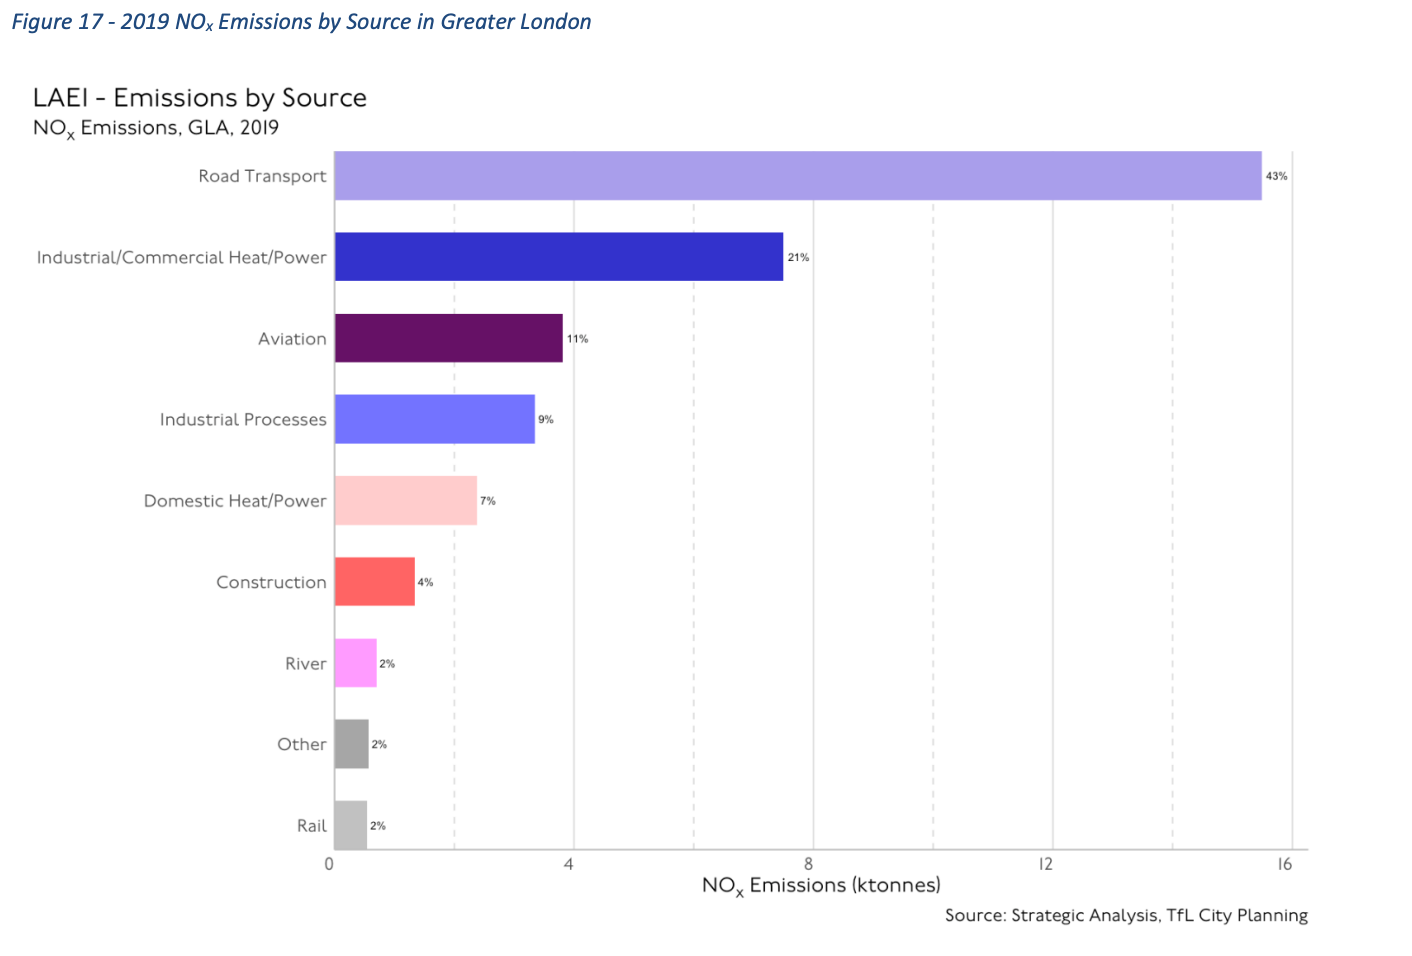

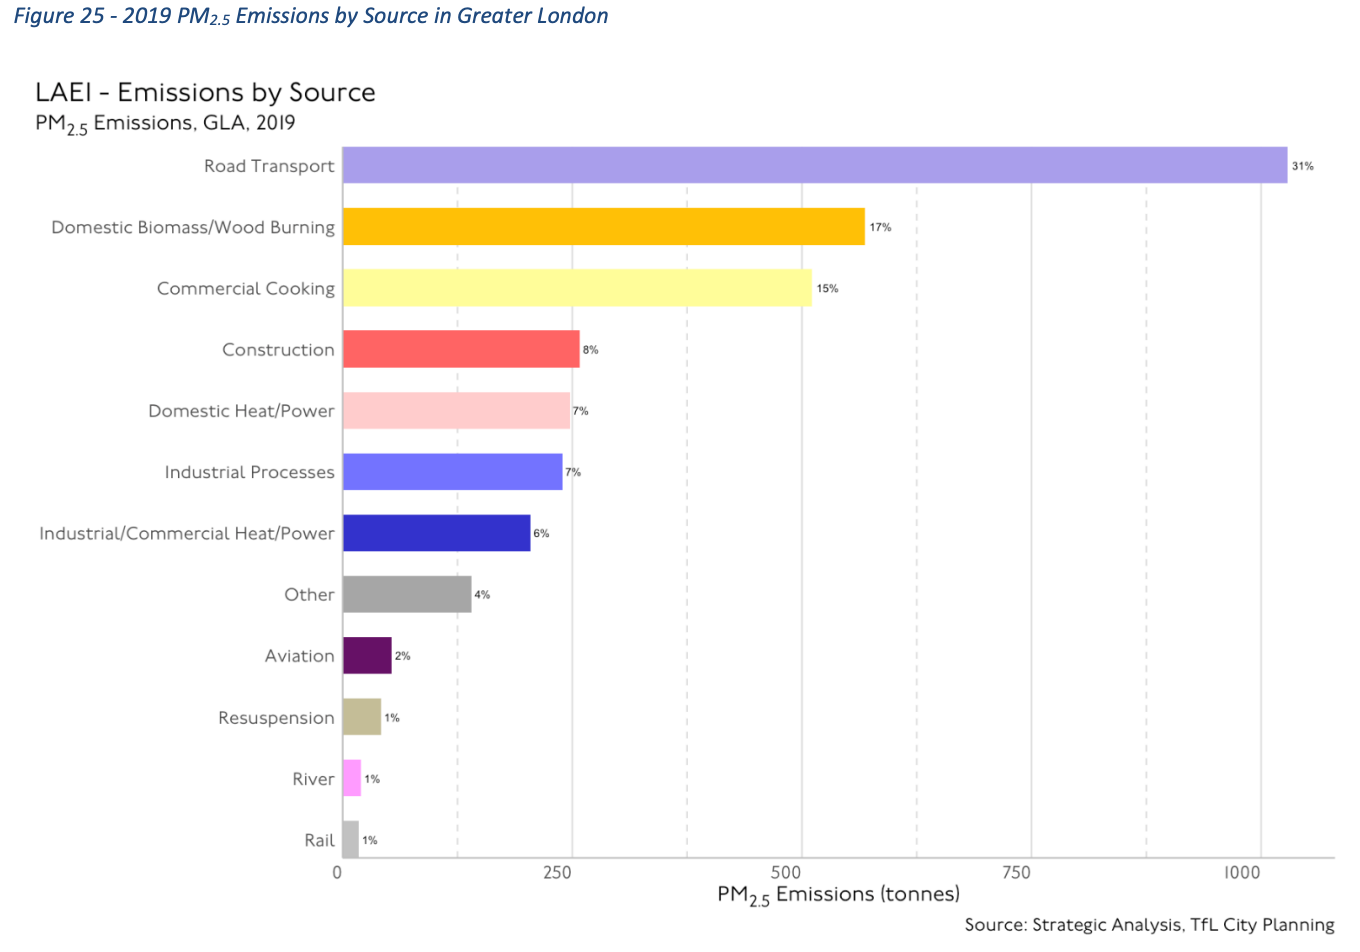

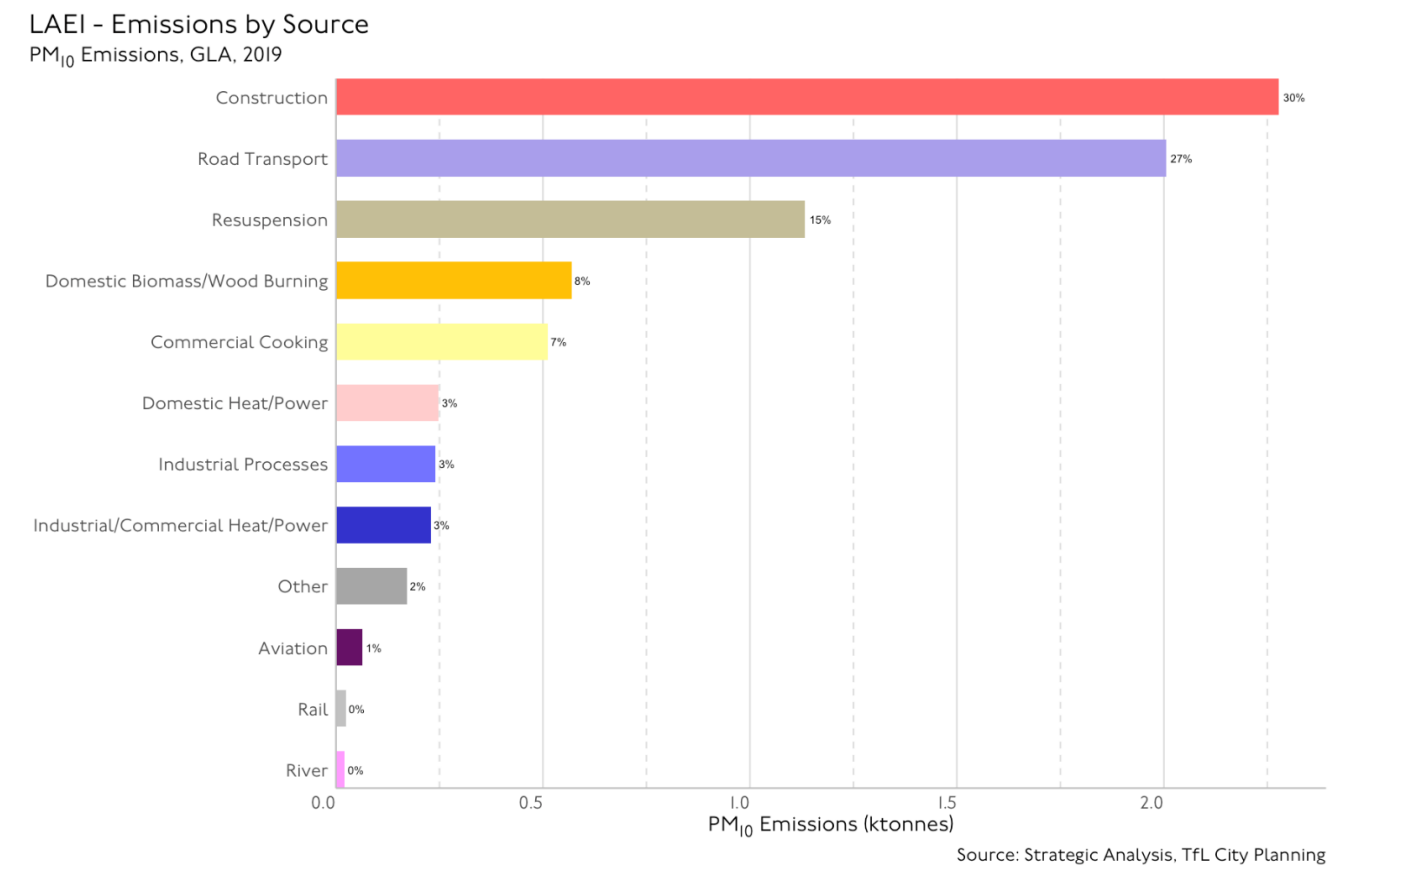

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Step 1.2: Selection of the datasets to explore in the context of this assignment

Various datasets are available in the context of this assignment.

While reviewing them, we have decided to work with **major roads traffic** (laei-2019-major-roads-vkm-flows-speeds.xlsx) and **major-roads-link-emissions** (LAEI2019-nox-pm-co2-major-roads-link-emissions.xlsx)

The **major-roads-link-emissions** dataset includes emissions of key pollutants NOx, PM10, PM2.5, and CO2 in tonnes/year for 2019, 2025, and 2030, while the **major roads traffic** dataset includes _Annual Average Daily Traffic_ (AADT) and _Vehicle Kilometers Traveled_VKM for diverse types of cars.

We would like to provide insights and predictions related to vehicles on major roads. This will help to quantify and predict the impact on vehicles on schemes such as the Ultra Low Emission Zone (ULEZ) and the London-wide Low Emission Zone (LEZ).

#### The objective we are trying to achieve

- Predicting pollutant emissions
- Identifying the characteristics (features) that contribute most to pollution
- Identifying the characteristics (features) that contribute less to pollution
- Based on the predictions and identifications, offer insights of future actions to combat these pollutants
 

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Step 1.3: Preparing datasets

In [174]:
# loading necessary libraries
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import geopandas as gpd
import folium
import pandas as pd
from IPython.display import display, IFrame
from pyproj import Transformer
from sklearn import feature_selection

In [175]:
import importlib
from helpers import utilities as utils

# Reload the module to reflect changes without restarting the kernel
importlib.reload(utils)

<module 'helpers.utilities' from 'e:\\Master_Program\\Practical_machine_Learning\\Final_Project_v2\\EmissionsML\\helpers\\utilities.py'>

In [176]:
traffic_df = pd.read_excel('./LAEI2019_dataset/laei-2019-major-roads-vkm-flows-speeds.xlsx')
traffic_df.head()

,Year,TOID,LAEI Zone,Borough,Road Classification,AADT Motorcycle,AADT Taxi,AADT Petrol Car,AADT Diesel Car,AADT Electric Car,...,VKM Electric LGV,VKM 2019 - HGVs - Rigid - 2 Axles,VKM 2019 - HGVs - Rigid - 3 Axles,VKM 2019 - HGVs - Rigid - 4 or more Axles,VKM 2019 - HGVs - Articulated - 3 to 4 Axles,VKM 2019 - HGVs - Articulated - 5 Axles,VKM 2019 - HGVs - Articulated - 6 Axles,VKM 2019 - Buses,VKM 2019 - Coaches,VKM 2019 - Total
0,2019,osgb4000000027947700,Non-GLA,Non-GLA,A Road,112,15,5470,3780,32,...,50,3659,736,1451,531,2759,3659,-,327,231749
1,2019,osgb4000000027908760,Non-GLA,Non-GLA,A Road,68,10,3049,2107,18,...,78,1718,344,687,258,1289,1718,-,1160,295268
2,2019,osgb4000000027987795,Non-GLA,Non-GLA,A Road,131,15,5752,3976,34,...,57,1377,275,551,192,1042,1377,-,7746,158880
3,2019,osgb4000000027869099,Non-GLA,Non-GLA,A Road,178,14,7280,5031,43,...,2066,63666,12679,25359,9172,48019,63396,-,97388,4851571
4,2019,osgb4000000030443012,Non-GLA,Non-GLA,A Road,178,34,8433,5828,50,...,11,465,94,185,67,352,465,-,446,43270


In [177]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79437 entries, 0 to 79436
Data columns (total 48 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Year                                             79437 non-null  int64 
 1   TOID                                             79437 non-null  object
 2   LAEI Zone                                        79437 non-null  object
 3   Borough                                          79437 non-null  object
 4   Road Classification                              79437 non-null  object
 5    AADT Motorcycle                                 79437 non-null  object
 6    AADT Taxi                                       79437 non-null  object
 7    AADT Petrol Car                                 79437 non-null  object
 8    AADT Diesel Car                                 79437 non-null  object
 9    AADT Electric Car                     

In [178]:
traffic_df.describe(include='all')

,Year,TOID,LAEI Zone,Borough,Road Classification,AADT Motorcycle,AADT Taxi,AADT Petrol Car,AADT Diesel Car,AADT Electric Car,...,VKM Electric LGV,VKM 2019 - HGVs - Rigid - 2 Axles,VKM 2019 - HGVs - Rigid - 3 Axles,VKM 2019 - HGVs - Rigid - 4 or more Axles,VKM 2019 - HGVs - Articulated - 3 to 4 Axles,VKM 2019 - HGVs - Articulated - 5 Axles,VKM 2019 - HGVs - Articulated - 6 Axles,VKM 2019 - Buses,VKM 2019 - Coaches,VKM 2019 - Total
count,79437.0,79437,79437,79437,79437,79437,79437,79437,79437,79437.0,...,79437,79437,79437,79437,79437,79437,79437,79437,79437,79437
unique,NaN,79437,4,34,12,1722,3119,12632,9719,233.0,...,2912,19386,7906,10758,5166,7782,10880,19413,15519,71678
top,NaN,osgb4000000027947700,Outer London,Non-GLA,A Road,-,-,-,-,15.0,...,-,-,-,-,-,-,-,-,-,-
freq,NaN,1,40317,12423,39533,765,1671,1267,1267,1631.0,...,1366,3517,5636,5664,12142,8589,8453,25624,12893,689
mean,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
traffic_df['Road Classification'].unique()

array(['A Road', 'B Road', 'C / Unclassified Road', 'M1', 'M20', 'M3',
       'M23', 'M40', 'M11', 'M4', 'A1M', 'M25'], dtype=object)

In [180]:
# check if 'TOID' field has duplicates
traffic_df['TOID'].duplicated().sum()

0

In [181]:
# check worksheets in the excel file
emissions_roads_excel = pd.ExcelFile('./LAEI2019_dataset/LAEI2019-nox-pm-co2-major-roads-link-emissions.xlsx')    
emissions_roads_excel.sheet_names

['NOx Road Link Emissions',
 'PM10 Road Link Emissions',
 'PM2.5 Road Link Emissions',
 'CO2 Road Link Emissions']

In [182]:
# get data from all worksheets seprarately in different dataframes
no2_emissions_df = pd.read_excel('./LAEI2019_dataset/LAEI2019-nox-pm-co2-major-roads-link-emissions.xlsx', sheet_name='NOx Road Link Emissions')

pm10_emissions_df = pd.read_excel('./LAEI2019_dataset/LAEI2019-nox-pm-co2-major-roads-link-emissions.xlsx', sheet_name='PM10 Road Link Emissions')

pm25_emissions_df = pd.read_excel('./LAEI2019_dataset/LAEI2019-nox-pm-co2-major-roads-link-emissions.xlsx', sheet_name='PM2.5 Road Link Emissions')

co2_emissions_df = pd.read_excel('./LAEI2019_dataset/LAEI2019-nox-pm-co2-major-roads-link-emissions.xlsx', sheet_name='CO2 Road Link Emissions')

co2_emissions_df.head()

,TOID,pollutant,emissions-units,Road-Car-Petrol-2019,Road-Car-Petrol-2025,Road-Car-Petrol-2030,Road-Car-Diesel-2019,Road-Car-Diesel-2025,Road-Car-Diesel-2030,Road-Car-Electric-2019,...,Road-Non-TfL-Bus-or-Coach-2030,Road-Taxi-2019,Road-Taxi-2025,Road-Taxi-2030,Road-Motorcycle-2019,Road-Motorcycle-2025,Road-Motorcycle-2030,Road-Total-2019,Road-Total-2025,Road-Total-2030
0,osgb4000000027865913,co2,tonnes/year,2763.570199,2331.358518,1706.930609,1705.209185,893.262488,461.235628,0.0,...,253.876434,6.324683,3.332339,1.801842,29.259917,29.957944,28.041087,7904.895141,6730.431700,5023.778425
1,osgb4000000027865914,co2,tonnes/year,2713.376548,2445.292626,1789.577008,1685.076926,940.003021,485.041539,0.0,...,307.521319,10.150393,5.607914,2.804731,30.827275,33.181880,30.921935,8702.673969,7866.363031,5926.646651
2,osgb4000000027865915,co2,tonnes/year,2404.585777,2609.937306,2776.488023,2590.502348,2173.106234,1571.199321,0.0,...,114.267378,10.734438,5.163807,2.831386,33.561561,33.583030,34.648523,15337.814806,14812.885648,13912.809961
3,osgb4000000027865916,co2,tonnes/year,2721.333674,3074.072175,3293.418440,2950.786728,2566.017631,1870.396514,0.0,...,110.441763,8.142775,4.420546,2.143181,37.795995,39.170888,40.706873,16930.355691,15343.751319,14525.422626
4,osgb4000000027865917,co2,tonnes/year,1624.662654,1806.606755,1913.067620,1759.154539,1504.997527,1083.956175,0.0,...,92.608975,9.103467,4.415462,2.304611,22.900134,23.363167,24.046898,10109.447860,9628.842597,9045.109539


In [183]:
# rename columns in the emissions dataframes to have a prefix of the pollutant name, example 'NO2_', except 'TOID', 'pollutant', 'year', 'emissions-units' columns
no2_emissions_df = no2_emissions_df.add_prefix('NO2_')
pm10_emissions_df = pm10_emissions_df.add_prefix('PM10_')
pm25_emissions_df = pm25_emissions_df.add_prefix('PM25_')
co2_emissions_df = co2_emissions_df.add_prefix('CO2_')

# rename these columns to its original name ('TOID', 'pollutant', 'emissions-units', 'pm-source')
no2_emissions_df.rename(columns={'NO2_TOID':'TOID', 'NO2_pollutant':'pollutant', 'NO2_emissions-units':'emissions-units'}, inplace=True)
pm10_emissions_df.rename(columns={'PM10_TOID':'TOID', 'PM10_pollutant':'pollutant', 'PM10_emissions-units':'emissions-units', 'PM10_pm-source':'pm-source'}, inplace=True)
pm25_emissions_df.rename(columns={'PM25_TOID':'TOID', 'PM25_pollutant':'pollutant', 'PM25_emissions-units':'emissions-units', 'PM25_pm-source':'pm-source'}, inplace=True)
co2_emissions_df.rename(columns={'CO2_TOID':'TOID', 'CO2_pollutant':'pollutant', 'CO2_emissions-units':'emissions-units'}, inplace=True)

In [184]:
no2_emissions_df.head()

,TOID,pollutant,emissions-units,NO2_Road-Car-Petrol-2019,NO2_Road-Car-Petrol-2025,NO2_Road-Car-Petrol-2030,NO2_Road-Car-Diesel-2019,NO2_Road-Car-Diesel-2025,NO2_Road-Car-Diesel-2030,NO2_Road-Car-Electric-2019,...,NO2_Road-Non-TfL-Bus-or-Coach-2030,NO2_Road-Taxi-2019,NO2_Road-Taxi-2025,NO2_Road-Taxi-2030,NO2_Road-Motorcycle-2019,NO2_Road-Motorcycle-2025,NO2_Road-Motorcycle-2030,NO2_Road-Total-2019,NO2_Road-Total-2025,NO2_Road-Total-2030
0,osgb4000000027865913,nox,tonnes/year,1.590568,0.937390,0.688089,6.993015,2.547169,0.982205,0.0,...,0.023191,0.030217,0.014223,0.005184,0.077711,0.051392,0.041953,17.808298,8.254211,4.029097
1,osgb4000000027865914,nox,tonnes/year,1.565236,0.977567,0.715561,7.108021,2.708920,1.042307,0.0,...,0.026764,0.050126,0.024463,0.008259,0.083772,0.057642,0.046855,20.860706,9.952764,4.814753
2,osgb4000000027865915,nox,tonnes/year,1.031740,1.080352,1.178718,10.018715,6.731314,3.615768,0.0,...,0.031377,0.045132,0.019841,0.007274,0.059342,0.034413,0.031767,26.321512,16.339590,10.312898
3,osgb4000000027865916,nox,tonnes/year,1.146019,1.213445,1.327884,11.792383,8.352974,4.484705,0.0,...,0.018603,0.035638,0.019018,0.006219,0.076658,0.053396,0.049647,29.731963,20.342981,12.889449
4,osgb4000000027865917,nox,tonnes/year,0.686157,0.720536,0.780170,6.986898,4.826629,2.565473,0.0,...,0.016966,0.039542,0.018417,0.006470,0.045465,0.030134,0.027751,18.725408,12.078740,7.614331


In [185]:
# check if 'TOID' field has duplicates in the emissions dataframes
print(no2_emissions_df['TOID'].duplicated().sum())
print(pm10_emissions_df['TOID'].duplicated().sum())
print(pm25_emissions_df['TOID'].duplicated().sum())
print(co2_emissions_df['TOID'].duplicated().sum())

0
158878
158878
0


In [186]:
# PM2.5 and PM10 emissions dataframes have duplicates in 'TOID' field due to the 'pm-source' column, so we will sum all values by 'TOID' for all pm-source values within the same TOID
# sum all values by 'TOID' for all pm-source values within the same TOID
pm10_emissions_df = pm10_emissions_df.groupby(['TOID', 'pollutant', 'emissions-units']).sum().reset_index()
pm25_emissions_df = pm25_emissions_df.groupby(['TOID', 'pollutant', 'emissions-units']).sum().reset_index()

# check if 'TOID' field has duplicates in the emissions dataframes
print(pm10_emissions_df['TOID'].duplicated().sum())
print(pm25_emissions_df['TOID'].duplicated().sum())


0
0


In [187]:
# we are interested in 2019 values only, so let's filter the dataframes to have only 2019 values and drop other columns for 2025 and 2030
# drop any columns containing 2025 and 2030 in its name
no2_emissions_df = no2_emissions_df[no2_emissions_df.columns.drop(list(no2_emissions_df.filter(regex='2025')))]
no2_emissions_df = no2_emissions_df[no2_emissions_df.columns.drop(list(no2_emissions_df.filter(regex='2030')))]

pm10_emissions_df = pm10_emissions_df[pm10_emissions_df.columns.drop(list(pm10_emissions_df.filter(regex='2025')))]
pm10_emissions_df = pm10_emissions_df[pm10_emissions_df.columns.drop(list(pm10_emissions_df.filter(regex='2030')))]

pm25_emissions_df = pm25_emissions_df[pm25_emissions_df.columns.drop(list(pm25_emissions_df.filter(regex='2025')))]
pm25_emissions_df = pm25_emissions_df[pm25_emissions_df.columns.drop(list(pm25_emissions_df.filter(regex='2030')))]

co2_emissions_df = co2_emissions_df[co2_emissions_df.columns.drop(list(co2_emissions_df.filter(regex='2025')))]
co2_emissions_df = co2_emissions_df[co2_emissions_df.columns.drop(list(co2_emissions_df.filter(regex='2030')))]

In [188]:
co2_emissions_df.head()

,TOID,pollutant,emissions-units,CO2_Road-Car-Petrol-2019,CO2_Road-Car-Diesel-2019,CO2_Road-Car-Electric-2019,CO2_Road-PHV-Petrol-2019,CO2_Road-PHV-Diesel-2019,CO2_Road-PHV-Electric-2019,CO2_Road-LGV-Petrol-2019,CO2_Road-LGV-Diesel-2019,CO2_Road-LGV-Electric-2019,CO2_Road-HGV-Rigid-2019,CO2_Road-HGV-Articulated-2019,CO2_Road-TfL-Bus-2019,CO2_Road-Non-TfL-Bus-or-Coach-2019,CO2_Road-Taxi-2019,CO2_Road-Motorcycle-2019,CO2_Road-Total-2019
0,osgb4000000027865913,co2,tonnes/year,2763.570199,1705.209185,0.0,79.874708,55.733491,0.0,10.646853,1433.932028,0.0,719.907087,812.958826,0.0,287.478165,6.324683,29.259917,7904.895141
1,osgb4000000027865914,co2,tonnes/year,2713.376548,1685.076926,0.0,90.339961,63.514661,0.0,13.640391,1893.474302,0.0,874.143183,988.081118,0.0,340.049210,10.150393,30.827275,8702.673969
2,osgb4000000027865915,co2,tonnes/year,2404.585777,2590.502348,0.0,207.308268,143.380508,0.0,28.926620,2366.696563,0.0,1603.731357,5817.421752,0.0,130.965613,10.734438,33.561561,15337.814806
3,osgb4000000027865916,co2,tonnes/year,2721.333674,2950.786728,0.0,198.636482,138.781437,0.0,28.990990,2489.848832,0.0,1774.656002,6425.954597,0.0,155.428179,8.142775,37.795995,16930.355691
4,osgb4000000027865917,co2,tonnes/year,1624.662654,1759.154539,0.0,117.834104,82.167449,0.0,20.764058,1768.135604,0.0,993.792755,3599.797813,0.0,111.135284,9.103467,22.900134,10109.447860


In [189]:
# emissions-units column has the same value for all rows, so we can drop it
no2_emissions_df.drop(columns=['emissions-units'], inplace=True)
pm10_emissions_df.drop(columns=['emissions-units'], inplace=True)
pm25_emissions_df.drop(columns=['emissions-units'], inplace=True)
co2_emissions_df.drop(columns=['emissions-units'], inplace=True)

co2_emissions_df.head()

,TOID,pollutant,CO2_Road-Car-Petrol-2019,CO2_Road-Car-Diesel-2019,CO2_Road-Car-Electric-2019,CO2_Road-PHV-Petrol-2019,CO2_Road-PHV-Diesel-2019,CO2_Road-PHV-Electric-2019,CO2_Road-LGV-Petrol-2019,CO2_Road-LGV-Diesel-2019,CO2_Road-LGV-Electric-2019,CO2_Road-HGV-Rigid-2019,CO2_Road-HGV-Articulated-2019,CO2_Road-TfL-Bus-2019,CO2_Road-Non-TfL-Bus-or-Coach-2019,CO2_Road-Taxi-2019,CO2_Road-Motorcycle-2019,CO2_Road-Total-2019
0,osgb4000000027865913,co2,2763.570199,1705.209185,0.0,79.874708,55.733491,0.0,10.646853,1433.932028,0.0,719.907087,812.958826,0.0,287.478165,6.324683,29.259917,7904.895141
1,osgb4000000027865914,co2,2713.376548,1685.076926,0.0,90.339961,63.514661,0.0,13.640391,1893.474302,0.0,874.143183,988.081118,0.0,340.049210,10.150393,30.827275,8702.673969
2,osgb4000000027865915,co2,2404.585777,2590.502348,0.0,207.308268,143.380508,0.0,28.926620,2366.696563,0.0,1603.731357,5817.421752,0.0,130.965613,10.734438,33.561561,15337.814806
3,osgb4000000027865916,co2,2721.333674,2950.786728,0.0,198.636482,138.781437,0.0,28.990990,2489.848832,0.0,1774.656002,6425.954597,0.0,155.428179,8.142775,37.795995,16930.355691
4,osgb4000000027865917,co2,1624.662654,1759.154539,0.0,117.834104,82.167449,0.0,20.764058,1768.135604,0.0,993.792755,3599.797813,0.0,111.135284,9.103467,22.900134,10109.447860


In [190]:
# drop the total emissions columns as we are interested in the emissions by road link and same data is present in the other columns
no2_emissions_df.drop(columns=['NO2_Road-Total-2019'], inplace=True)
pm10_emissions_df.drop(columns=['PM10_Road-Total-2019'], inplace=True)
pm25_emissions_df.drop(columns=['PM25_Road-Total-2019'], inplace=True)
co2_emissions_df.drop(columns=['CO2_Road-Total-2019'], inplace=True)

co2_emissions_df.head()

,TOID,pollutant,CO2_Road-Car-Petrol-2019,CO2_Road-Car-Diesel-2019,CO2_Road-Car-Electric-2019,CO2_Road-PHV-Petrol-2019,CO2_Road-PHV-Diesel-2019,CO2_Road-PHV-Electric-2019,CO2_Road-LGV-Petrol-2019,CO2_Road-LGV-Diesel-2019,CO2_Road-LGV-Electric-2019,CO2_Road-HGV-Rigid-2019,CO2_Road-HGV-Articulated-2019,CO2_Road-TfL-Bus-2019,CO2_Road-Non-TfL-Bus-or-Coach-2019,CO2_Road-Taxi-2019,CO2_Road-Motorcycle-2019
0,osgb4000000027865913,co2,2763.570199,1705.209185,0.0,79.874708,55.733491,0.0,10.646853,1433.932028,0.0,719.907087,812.958826,0.0,287.478165,6.324683,29.259917
1,osgb4000000027865914,co2,2713.376548,1685.076926,0.0,90.339961,63.514661,0.0,13.640391,1893.474302,0.0,874.143183,988.081118,0.0,340.049210,10.150393,30.827275
2,osgb4000000027865915,co2,2404.585777,2590.502348,0.0,207.308268,143.380508,0.0,28.926620,2366.696563,0.0,1603.731357,5817.421752,0.0,130.965613,10.734438,33.561561
3,osgb4000000027865916,co2,2721.333674,2950.786728,0.0,198.636482,138.781437,0.0,28.990990,2489.848832,0.0,1774.656002,6425.954597,0.0,155.428179,8.142775,37.795995
4,osgb4000000027865917,co2,1624.662654,1759.154539,0.0,117.834104,82.167449,0.0,20.764058,1768.135604,0.0,993.792755,3599.797813,0.0,111.135284,9.103467,22.900134


In [191]:
# rename columns that include '2019' in its name to remove it and tide up the column names
no2_emissions_df.columns = no2_emissions_df.columns.str.replace('-2019', '')
pm10_emissions_df.columns = pm10_emissions_df.columns.str.replace('-2019', '')
pm25_emissions_df.columns = pm25_emissions_df.columns.str.replace('-2019', '')
co2_emissions_df.columns = co2_emissions_df.columns.str.replace('-2019', '')

co2_emissions_df.head()

,TOID,pollutant,CO2_Road-Car-Petrol,CO2_Road-Car-Diesel,CO2_Road-Car-Electric,CO2_Road-PHV-Petrol,CO2_Road-PHV-Diesel,CO2_Road-PHV-Electric,CO2_Road-LGV-Petrol,CO2_Road-LGV-Diesel,CO2_Road-LGV-Electric,CO2_Road-HGV-Rigid,CO2_Road-HGV-Articulated,CO2_Road-TfL-Bus,CO2_Road-Non-TfL-Bus-or-Coach,CO2_Road-Taxi,CO2_Road-Motorcycle
0,osgb4000000027865913,co2,2763.570199,1705.209185,0.0,79.874708,55.733491,0.0,10.646853,1433.932028,0.0,719.907087,812.958826,0.0,287.478165,6.324683,29.259917
1,osgb4000000027865914,co2,2713.376548,1685.076926,0.0,90.339961,63.514661,0.0,13.640391,1893.474302,0.0,874.143183,988.081118,0.0,340.049210,10.150393,30.827275
2,osgb4000000027865915,co2,2404.585777,2590.502348,0.0,207.308268,143.380508,0.0,28.926620,2366.696563,0.0,1603.731357,5817.421752,0.0,130.965613,10.734438,33.561561
3,osgb4000000027865916,co2,2721.333674,2950.786728,0.0,198.636482,138.781437,0.0,28.990990,2489.848832,0.0,1774.656002,6425.954597,0.0,155.428179,8.142775,37.795995
4,osgb4000000027865917,co2,1624.662654,1759.154539,0.0,117.834104,82.167449,0.0,20.764058,1768.135604,0.0,993.792755,3599.797813,0.0,111.135284,9.103467,22.900134


In [192]:
# drop 'pm-source' column as it is not required after summing all values by 'TOID' for all pm-source values within the same TOID
pm10_emissions_df.drop(columns=['pm-source'], inplace=True)
pm25_emissions_df.drop(columns=['pm-source'], inplace=True)

In [193]:
# calculate the average emissions for each road link using the columns that have emissions values
no2_emissions_df['NO2_Avg'] = no2_emissions_df.iloc[:, 2:].mean(axis=1)
pm10_emissions_df['PM10_Avg'] = pm10_emissions_df.iloc[:, 2:].mean(axis=1)
pm25_emissions_df['PM25_Avg'] = pm25_emissions_df.iloc[:, 2:].mean(axis=1)
co2_emissions_df['CO2_Avg'] = co2_emissions_df.iloc[:, 2:].mean(axis=1)

co2_emissions_df.head()

,TOID,pollutant,CO2_Road-Car-Petrol,CO2_Road-Car-Diesel,CO2_Road-Car-Electric,CO2_Road-PHV-Petrol,CO2_Road-PHV-Diesel,CO2_Road-PHV-Electric,CO2_Road-LGV-Petrol,CO2_Road-LGV-Diesel,CO2_Road-LGV-Electric,CO2_Road-HGV-Rigid,CO2_Road-HGV-Articulated,CO2_Road-TfL-Bus,CO2_Road-Non-TfL-Bus-or-Coach,CO2_Road-Taxi,CO2_Road-Motorcycle,CO2_Avg
0,osgb4000000027865913,co2,2763.570199,1705.209185,0.0,79.874708,55.733491,0.0,10.646853,1433.932028,0.0,719.907087,812.958826,0.0,287.478165,6.324683,29.259917,526.993009
1,osgb4000000027865914,co2,2713.376548,1685.076926,0.0,90.339961,63.514661,0.0,13.640391,1893.474302,0.0,874.143183,988.081118,0.0,340.049210,10.150393,30.827275,580.178265
2,osgb4000000027865915,co2,2404.585777,2590.502348,0.0,207.308268,143.380508,0.0,28.926620,2366.696563,0.0,1603.731357,5817.421752,0.0,130.965613,10.734438,33.561561,1022.520987
3,osgb4000000027865916,co2,2721.333674,2950.786728,0.0,198.636482,138.781437,0.0,28.990990,2489.848832,0.0,1774.656002,6425.954597,0.0,155.428179,8.142775,37.795995,1128.690379
4,osgb4000000027865917,co2,1624.662654,1759.154539,0.0,117.834104,82.167449,0.0,20.764058,1768.135604,0.0,993.792755,3599.797813,0.0,111.135284,9.103467,22.900134,673.963191


In [194]:
# let's drop the columns that have emissions values as we have calculated the average emissions for each road link
no2_emissions_df.drop(no2_emissions_df.iloc[:, 2:-1], axis=1, inplace=True)
pm10_emissions_df.drop(pm10_emissions_df.iloc[:, 2:-1], axis=1, inplace=True)
pm25_emissions_df.drop(pm25_emissions_df.iloc[:, 2:-1], axis=1, inplace=True)
co2_emissions_df.drop(co2_emissions_df.iloc[:, 2:-1], axis=1, inplace=True)

co2_emissions_df.head()

,TOID,pollutant,CO2_Avg
0,osgb4000000027865913,co2,526.993009
1,osgb4000000027865914,co2,580.178265
2,osgb4000000027865915,co2,1022.520987
3,osgb4000000027865916,co2,1128.690379
4,osgb4000000027865917,co2,673.963191


In [195]:
# let us drop the 'pollutant' column as it is not required
no2_emissions_df.drop(columns=['pollutant'], inplace=True)
pm10_emissions_df.drop(columns=['pollutant'], inplace=True)
pm25_emissions_df.drop(columns=['pollutant'], inplace=True)
co2_emissions_df.drop(columns=['pollutant'], inplace=True)

In [196]:
# merge the 4 emissions dataframes in a single dataframe using 'TOID' as the key
emissions_df = pd.merge(no2_emissions_df, pm10_emissions_df, on='TOID', how='outer')
emissions_df = pd.merge(emissions_df, pm25_emissions_df, on='TOID', how='outer')
emissions_df = pd.merge(emissions_df, co2_emissions_df, on='TOID', how='outer')

emissions_df.head()

,TOID,NO2_Avg,PM10_Avg,PM25_Avg,CO2_Avg
0,osgb4000000027865913,1.187220,0.058674,0.039993,526.993009
1,osgb4000000027865914,1.390714,0.062788,0.043506,580.178265
2,osgb4000000027865915,1.754767,0.111070,0.068895,1022.520987
3,osgb4000000027865916,1.982131,0.105809,0.069126,1128.690379
4,osgb4000000027865917,1.248361,0.064831,0.042272,673.963191


In [197]:
# check missing values, seros, or NA in the road traffic dataframe  
traffic_df.isnull().sum()

# check missing values, seros, or NA in the emissions dataframe
emissions_df.isnull().sum()

TOID         0
NO2_Avg     51
PM10_Avg     0
PM25_Avg     0
CO2_Avg     51
dtype: int64

In [198]:
emissions_df.shape

(79439, 5)

In [199]:
# drop rows with missing values in the emissions dataframe
emissions_df.dropna(inplace=True)

In [200]:
# drop year column as it is not required in the traffic dataframe
traffic_df.drop(columns=['Year'], inplace=True)

In [201]:
# rename columns and tide up their names in the traffic dataframe

def clean_column_names(df: pd.DataFrame) -> pd.DataFrame:
    def clean_name(col):
        col = col.strip()  # Remove leading/trailing spaces
        col = re.sub(r'\s+', '_', col)  # Replace spaces with single underscore
        col = re.sub(r'2019', '', col)  # Replace spaces with single underscore
        col = re.sub(r'[_-]+', '_', col)  # Remove excessive dashes/underscores
        col = re.sub(r'_(km_hr)', r'(km/hr)', col)  # Restore proper unit formatting
        col = re.sub(r'_(m)$', r'(m)', col)  # Restore proper unit formatting
        col = re.sub(r'_+', '_', col)  # Final clean-up of multiple underscores
        col = col.lower()  # Convert to lowercase
        return col.strip('_')  # Remove any trailing underscores

    df.columns = [clean_name(col) for col in df.columns]
    return df

    df.columns = [clean_name(col) for col in df.columns]
    return df

df = clean_column_names(traffic_df)
print(df.columns)

Index(['toid', 'laei_zone', 'borough', 'road_classification',
       'aadt_motorcycle', 'aadt_taxi', 'aadt_petrol_car', 'aadt_diesel_car',
       'aadt_electric_car', 'aadt_petrol_phv', 'aadt_diesel_phv',
       'aadt_electric_phv', 'aadt_petrol_lgv', 'aadt_diesel_lgv',
       'aadt_electric_lgv', 'aadt_hgvs_rigid_2_axles',
       'aadt_hgvs_rigid_3_axles', 'aadt_hgvs_rigid_4_or_more_axles',
       'aadt_hgvs_articulated_3_to_4_axles', 'aadt_hgvs_articulated_5_axles',
       'aadt_hgvs_articulated_6_axles', 'aadt_buses', 'aadt_coaches',
       'aadt_total', 'speed_(km/hr)_except_buses', 'speed_(km/hr)_buses_only',
       'link_length_(m)', 'vkm_motorcycle', 'vkm_taxi', 'vkm_petrol_car',
       'vkm_diesel_car', 'vkm_electric_car', 'vkm_petrol_phv',
       'vkm_diesel_phv', 'vkm_electric_phv', 'vkm_petrol_lgv',
       'vkm_diesel_lgv', 'vkm_electric_lgv', 'vkm_hgvs_rigid_2_axles',
       'vkm_hgvs_rigid_3_axles', 'vkm_hgvs_rigid_4_or_more_axles',
       'vkm_hgvs_articulated_3_to_4_axle

In [202]:
# check the missing values, zeros, NA in the traffic dataframe
traffic_df.isnull().sum()

toid                                  0
laei_zone                             0
borough                               0
road_classification                   0
aadt_motorcycle                       0
aadt_taxi                             0
aadt_petrol_car                       0
aadt_diesel_car                       0
aadt_electric_car                     0
aadt_petrol_phv                       0
aadt_diesel_phv                       0
aadt_electric_phv                     0
aadt_petrol_lgv                       0
aadt_diesel_lgv                       0
aadt_electric_lgv                     0
aadt_hgvs_rigid_2_axles               0
aadt_hgvs_rigid_3_axles               0
aadt_hgvs_rigid_4_or_more_axles       0
aadt_hgvs_articulated_3_to_4_axles    0
aadt_hgvs_articulated_5_axles         0
aadt_hgvs_articulated_6_axles         0
aadt_buses                            0
aadt_coaches                          0
aadt_total                            0
speed_(km/hr)_except_buses            0


In [203]:
# check duplicates in the traffic dataframe
traffic_df.duplicated().sum()

0

In [204]:
# drop columns with total values as same data is present in the other columns
traffic_df.drop(columns=['aadt_total', 'vkm_total'], inplace=True)

In [205]:
# drop speed and link length columns as they are not required, these columns are redundunt as they are used to calculate the vkm columns

traffic_df.drop(columns=['link_length_(m)', 'speed_(km/hr)_except_buses','speed_(km/hr)_buses_only'], inplace=True)

In [206]:
traffic_df.head()

,toid,laei_zone,borough,road_classification,aadt_motorcycle,aadt_taxi,aadt_petrol_car,aadt_diesel_car,aadt_electric_car,aadt_petrol_phv,...,vkm_diesel_lgv,vkm_electric_lgv,vkm_hgvs_rigid_2_axles,vkm_hgvs_rigid_3_axles,vkm_hgvs_rigid_4_or_more_axles,vkm_hgvs_articulated_3_to_4_axles,vkm_hgvs_articulated_5_axles,vkm_hgvs_articulated_6_axles,vkm_buses,vkm_coaches
0,osgb4000000027947700,Non-GLA,Non-GLA,A Road,112,15,5470,3780,32,92,...,22586,50,3659,736,1451,531,2759,3659,-,327
1,osgb4000000027908760,Non-GLA,Non-GLA,A Road,68,10,3049,2107,18,339,...,35317,78,1718,344,687,258,1289,1718,-,1160
2,osgb4000000027987795,Non-GLA,Non-GLA,A Road,131,15,5752,3976,34,68,...,25937,57,1377,275,551,192,1042,1377,-,7746
3,osgb4000000027869099,Non-GLA,Non-GLA,A Road,178,14,7280,5031,43,395,...,941266,2066,63666,12679,25359,9172,48019,63396,-,97388
4,osgb4000000030443012,Non-GLA,Non-GLA,A Road,178,34,8433,5828,50,217,...,5195,11,465,94,185,67,352,465,-,446


In [207]:
traffic_df["borough"].unique()

array(['Non-GLA', 'Bromley', 'Brent', 'Barking and Dagenham',
       'Hillingdon', 'Hounslow', 'Redbridge', 'Barnet', 'Ealing',
       'Croydon', 'Bexley', 'Southwark', 'Greenwich', 'Richmond',
       'Lambeth', 'Merton', 'Kingston', 'Harrow', 'Enfield', 'Wandsworth',
       'Havering', 'Newham', 'Waltham Forest', 'Sutton', 'Lewisham',
       'Haringey', 'Westminster', 'Hammersmith and Fulham',
       'Tower Hamlets', 'Hackney', 'Kensington and Chelsea', 'Islington',
       'Camden', 'City of London'], dtype=object)

In [208]:
# convert the column names in the emissions dataframe to lowercase
emissions_df.columns = [col.lower() for col in emissions_df.columns]

In [209]:
# merge the traffic and emissions dataframes using 'TOID' as the key

merged_df = pd.merge(traffic_df, emissions_df, on='toid', how='inner')

In [210]:
merged_df.head()

,toid,laei_zone,borough,road_classification,aadt_motorcycle,aadt_taxi,aadt_petrol_car,aadt_diesel_car,aadt_electric_car,aadt_petrol_phv,...,vkm_hgvs_rigid_4_or_more_axles,vkm_hgvs_articulated_3_to_4_axles,vkm_hgvs_articulated_5_axles,vkm_hgvs_articulated_6_axles,vkm_buses,vkm_coaches,no2_avg,pm10_avg,pm25_avg,co2_avg
0,osgb4000000027947700,Non-GLA,Non-GLA,A Road,112,15,5470,3780,32,92,...,1451,531,2759,3659,-,327,0.005753,0.000314,0.000211,2.792777
1,osgb4000000027908760,Non-GLA,Non-GLA,A Road,68,10,3049,2107,18,339,...,687,258,1289,1718,-,1160,0.006902,0.001202,0.000594,2.956107
2,osgb4000000027987795,Non-GLA,Non-GLA,A Road,131,15,5752,3976,34,68,...,551,192,1042,1377,-,7746,0.008236,0.000866,0.000439,3.176504
3,osgb4000000027869099,Non-GLA,Non-GLA,A Road,178,14,7280,5031,43,395,...,25359,9172,48019,63396,-,97388,0.164691,0.025206,0.012406,64.934024
4,osgb4000000030443012,Non-GLA,Non-GLA,A Road,178,34,8433,5828,50,217,...,185,67,352,465,-,446,0.001088,0.000063,0.000041,0.503903


In [211]:
# check values in "laei_zone" column
merged_df["laei_zone"].unique()

array(['Non-GLA', 'Outer London', 'Inner London', 'Central London'],
      dtype=object)

In [212]:
# check values in "road_classification" column
merged_df["road_classification"].unique()

array(['A Road', 'B Road', 'C / Unclassified Road', 'M1', 'M20', 'M3',
       'M23', 'M40', 'M11', 'M4', 'A1M', 'M25'], dtype=object)

In [213]:
# drop 'borough' column as it is not required
merged_df.drop(columns=['borough'], inplace=True)

In [214]:
def label_encode_dataframe(df: pd.DataFrame, categorical_cols: list):
    encoders = {}
    
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])  # Transform column
        encoders[col] = le  # Store encoder for future use
    
    return df, encoders

In [215]:
categorical_columns = ['road_classification']

merged_df, roads_encoders = label_encode_dataframe(merged_df, categorical_columns)

In [216]:
merged_df.head()    

,toid,laei_zone,road_classification,aadt_motorcycle,aadt_taxi,aadt_petrol_car,aadt_diesel_car,aadt_electric_car,aadt_petrol_phv,aadt_diesel_phv,...,vkm_hgvs_rigid_4_or_more_axles,vkm_hgvs_articulated_3_to_4_axles,vkm_hgvs_articulated_5_axles,vkm_hgvs_articulated_6_axles,vkm_buses,vkm_coaches,no2_avg,pm10_avg,pm25_avg,co2_avg
0,osgb4000000027947700,Non-GLA,0,112,15,5470,3780,32,92,76,...,1451,531,2759,3659,-,327,0.005753,0.000314,0.000211,2.792777
1,osgb4000000027908760,Non-GLA,0,68,10,3049,2107,18,339,279,...,687,258,1289,1718,-,1160,0.006902,0.001202,0.000594,2.956107
2,osgb4000000027987795,Non-GLA,0,131,15,5752,3976,34,68,56,...,551,192,1042,1377,-,7746,0.008236,0.000866,0.000439,3.176504
3,osgb4000000027869099,Non-GLA,0,178,14,7280,5031,43,395,325,...,25359,9172,48019,63396,-,97388,0.164691,0.025206,0.012406,64.934024
4,osgb4000000030443012,Non-GLA,0,178,34,8433,5828,50,217,178,...,185,67,352,465,-,446,0.001088,0.000063,0.000041,0.503903


In [217]:
# apply one-hot encoding to the 'laei_zone' column
#merged_df = pd.get_dummies(merged_df, columns=['laei_zone'], drop_first=True)
merged_df = pd.get_dummies(merged_df, columns=['laei_zone'], drop_first=True, dtype = int)

merged_df.head()

,toid,road_classification,aadt_motorcycle,aadt_taxi,aadt_petrol_car,aadt_diesel_car,aadt_electric_car,aadt_petrol_phv,aadt_diesel_phv,aadt_electric_phv,...,vkm_hgvs_articulated_6_axles,vkm_buses,vkm_coaches,no2_avg,pm10_avg,pm25_avg,co2_avg,laei_zone_Inner London,laei_zone_Non-GLA,laei_zone_Outer London
0,osgb4000000027947700,0,112,15,5470,3780,32,92,76,1,...,3659,-,327,0.005753,0.000314,0.000211,2.792777,0,1,0
1,osgb4000000027908760,0,68,10,3049,2107,18,339,279,5,...,1718,-,1160,0.006902,0.001202,0.000594,2.956107,0,1,0
2,osgb4000000027987795,0,131,15,5752,3976,34,68,56,1,...,1377,-,7746,0.008236,0.000866,0.000439,3.176504,0,1,0
3,osgb4000000027869099,0,178,14,7280,5031,43,395,325,6,...,63396,-,97388,0.164691,0.025206,0.012406,64.934024,0,1,0
4,osgb4000000030443012,0,178,34,8433,5828,50,217,178,3,...,465,-,446,0.001088,0.000063,0.000041,0.503903,0,1,0


In [218]:
print(merged_df.columns)

Index(['toid', 'road_classification', 'aadt_motorcycle', 'aadt_taxi',
       'aadt_petrol_car', 'aadt_diesel_car', 'aadt_electric_car',
       'aadt_petrol_phv', 'aadt_diesel_phv', 'aadt_electric_phv',
       'aadt_petrol_lgv', 'aadt_diesel_lgv', 'aadt_electric_lgv',
       'aadt_hgvs_rigid_2_axles', 'aadt_hgvs_rigid_3_axles',
       'aadt_hgvs_rigid_4_or_more_axles', 'aadt_hgvs_articulated_3_to_4_axles',
       'aadt_hgvs_articulated_5_axles', 'aadt_hgvs_articulated_6_axles',
       'aadt_buses', 'aadt_coaches', 'vkm_motorcycle', 'vkm_taxi',
       'vkm_petrol_car', 'vkm_diesel_car', 'vkm_electric_car',
       'vkm_petrol_phv', 'vkm_diesel_phv', 'vkm_electric_phv',
       'vkm_petrol_lgv', 'vkm_diesel_lgv', 'vkm_electric_lgv',
       'vkm_hgvs_rigid_2_axles', 'vkm_hgvs_rigid_3_axles',
       'vkm_hgvs_rigid_4_or_more_axles', 'vkm_hgvs_articulated_3_to_4_axles',
       'vkm_hgvs_articulated_5_axles', 'vkm_hgvs_articulated_6_axles',
       'vkm_buses', 'vkm_coaches', 'no2_avg', 'pm10_av

In [219]:
# Load OS MasterMap data as a GeoDataFrame
os_data = gpd.read_file("./LAEI2019_dataset/LAEI2019-Supporting-Information-GIS-Files/Shapefile SHP/LAEI2019_Grid.shp")
os_data.head()

,Grid_ID_19,GridIdEx,1km2_ID,Easting,Northing,Area_km2,Borough,Zone,geometry
0,1,1,5910,510500,203500,1.0,NonGLA,NonGLA,"POLYGON ((511000.001 203000.001, 509999.999 20..."
1,2,2,5911,511500,203500,1.0,NonGLA,NonGLA,"POLYGON ((512000.003 203000.001, 511000.001 20..."
2,3,3,5912,512500,203500,1.0,NonGLA,NonGLA,"POLYGON ((512999.997 203000.001, 512000.003 20..."
3,4,4,5915,515500,203500,1.0,NonGLA,NonGLA,"POLYGON ((516000.004 203000.001, 515000.002 20..."
4,5,5,5916,516500,203500,1.0,NonGLA,NonGLA,"POLYGON ((516999.998 203000.001, 516000.004 20..."


In [220]:

# Load OS MasterMap data as a GeoDataFrame
os_data = gpd.read_file("./LAEI2019_dataset/LAEI2019-Supporting-Information-GIS-Files/Shapefile SHP/LAEI2019-co2-major-roads-link-emissions.shp")
print(os_data.columns)
# Create a mapping from TOID to geographic coordinates
toid_to_coordinates = {
    row['TOID']: [row.geometry.centroid.y, row.geometry.centroid.x] 
    for _, row in os_data.iterrows()
}

#print(toid_to_coordinates)

os_data.head()

Index(['TOID', 'Pollutant', 'SourceType', 'Units', 'Car_Pet_19', 'Car_Pet_25',
       'Car_Pet_30', 'Car_Die_19', 'Car_Die_25', 'Car_Die_30', 'Car_Ele_19',
       'Car_Ele_25', 'Car_Ele_30', 'PHV_Pet_19', 'PHV_Pet_25', 'PHV_Pet_30',
       'PHV_Die_19', 'PHV_Die_25', 'PHV_Die_30', 'PHV_Ele_19', 'PHV_Ele_25',
       'PHV_Ele_30', 'LGV_Pet_19', 'LGV_Pet_25', 'LGV_Pet_30', 'LGV_Die_19',
       'LGV_Die_25', 'LGV_Die_30', 'LGV_Ele_19', 'LGV_Ele_25', 'LGV_Ele_30',
       'HGV_Rig_19', 'HGV_Rig_25', 'HGV_Rig_30', 'HGV_Art_19', 'HGV_Art_25',
       'HGV_Art_30', 'TfL_Bus_19', 'TfL_Bus_25', 'TfL_Bus_30', 'Coach_19',
       'Coach_25', 'Coach_30', 'Taxi_19', 'Taxi_25', 'Taxi_30', 'MCycle_19',
       'MCycle_25', 'MCycle_30', 'All_Veh_19', 'All_Veh_25', 'All_Veh_30',
       'Info', 'geometry'],
      dtype='object')


,TOID,Pollutant,SourceType,Units,Car_Pet_19,Car_Pet_25,Car_Pet_30,Car_Die_19,Car_Die_25,Car_Die_30,...,Taxi_25,Taxi_30,MCycle_19,MCycle_25,MCycle_30,All_Veh_19,All_Veh_25,All_Veh_30,Info,geometry
0,osgb4000000027865913,co2,Exhaust,tonnes/year,2763.570199,2331.358518,1706.930609,1705.209185,893.262488,461.235628,...,3.332339,1.801842,29.259917,29.957944,28.041087,7904.895141,6730.431700,5023.778425,None,"LINESTRING (512531.737 198902.094, 512513.001 ..."
1,osgb4000000027865914,co2,Exhaust,tonnes/year,2713.376548,2445.292626,1789.577008,1685.076926,940.003021,485.041539,...,5.607914,2.804731,30.827275,33.181880,30.921935,8702.673969,7866.363031,5926.646651,None,"LINESTRING (512274.001 201217, 512280.001 2012..."
2,osgb4000000027865915,co2,Exhaust,tonnes/year,2404.585777,2609.937306,2776.488023,2590.502348,2173.106234,1571.199321,...,5.163807,2.831386,33.561561,33.583030,34.648523,15337.814806,14812.885648,13912.809961,None,"LINESTRING (517876.404 202626.361, 517865.001 ..."
3,osgb4000000027865916,co2,Exhaust,tonnes/year,2721.333674,3074.072175,3293.418440,2950.786728,2566.017631,1870.396514,...,4.420546,2.143181,37.795995,39.170888,40.706873,16930.355691,15343.751319,14525.422626,None,"LINESTRING (515356.001 202612, 515387.001 2026..."
4,osgb4000000027865917,co2,Exhaust,tonnes/year,1624.662654,1806.606755,1913.067620,1759.154539,1504.997527,1083.956175,...,4.415462,2.304611,22.900134,23.363167,24.046898,10109.447860,9628.842597,9045.109539,None,"LINESTRING (525667.001 199889, 525646.001 1998..."


In [221]:
# Transformer to convert British National Grid to WGS84 (Lat, Lon)
transformer = Transformer.from_crs("epsg:27700", "epsg:4326")

def create_emissions_map(data: pd.DataFrame, emission_col: str, toid_col: str, map_file: str = "emissions_map.html"):
    # Create a base map centered around London with explicit tiles
    emissions_map = folium.Map(location=[51.5074, -0.1278], zoom_start=10, tiles='OpenStreetMap')

    # Add emission points to the map with TOID information
    for _, row in data[:1000].iterrows():
        toid = row[toid_col]
        if toid in toid_to_coordinates:
            easting, northing = toid_to_coordinates[toid]
            latitude, longitude = transformer.transform(northing, easting)
            folium.CircleMarker(
                location=[latitude, longitude],
                radius=5 + row[emission_col] * 0.2,  # Scale the circle size by emission value
                color='red',
                fill=True,
                fill_color='red',
                fill_opacity=0.6,
                popup=f"TOID: {toid}\nEmissions: {row[emission_col]}"
            ).add_to(emissions_map)

    folium.LayerControl().add_to(emissions_map)

    # Save the map as an HTML file
    emissions_map.save(map_file)
    print(f"Map has been created and saved as {map_file}")
    # Display the map in the notebook
    return emissions_map

map = create_emissions_map(merged_df, 'co2_avg', 'toid', 'emissions_map.html')

Map has been created and saved as emissions_map.html


In [222]:
map

In [223]:
def compute_and_visualize_correlation(df: pd.DataFrame, method: str = 'pearson'):
    if method not in ['pearson', 'spearman', 'kendall']:
        raise ValueError("Method not supported. Choose from 'pearson', 'spearman', or 'kendall'.")

    df_numeric = df.select_dtypes(include=['number'])

    # Compute correlation matrix
    corr_matrix = df.corr(method=method)

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title(f'{method.capitalize()} Correlation Matrix', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()

    return corr_matrix

In [224]:
def clean_and_convert_numeric(df: pd.DataFrame):
    df_cleaned = df.copy()

    # Identify non-numeric columns
    non_numeric_cols = df_cleaned.select_dtypes(exclude=['number']).columns.tolist()

    for col in non_numeric_cols:
        # Replace dashes, spaces, and NaN values with '0'
        df_cleaned[col] = df_cleaned[col].replace(['-', ' '], '0').fillna('0')

        # Convert column to numeric (handling conversion errors)
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce').fillna(0)

    return df_cleaned

In [225]:
# Compute and visualize the correlation matrix using Pearson method
final_merged_df = merged_df.drop(columns=['toid'])
final_merged_df = clean_and_convert_numeric(final_merged_df)

# check if there are any columns are still non-numeric
final_merged_df.select_dtypes(exclude=['number']).columns

Index([], dtype='object')

In [226]:
# remove all zero rows from the dataframe
final_merged_df = utils.remove_all_zero_rows(final_merged_df, 
        exclude=['laei_zone_Inner London', 'laei_zone_Non-GLA', 'laei_zone_Outer London'])

Removed 166 all-zero rows (based on 43 columns).


no2_avg: 7429 outliers detected
pm10_avg: 7472 outliers detected
pm25_avg: 7516 outliers detected
co2_avg: 7377 outliers detected

Total outlier rows: 8513 out of 79222 (10.75%)


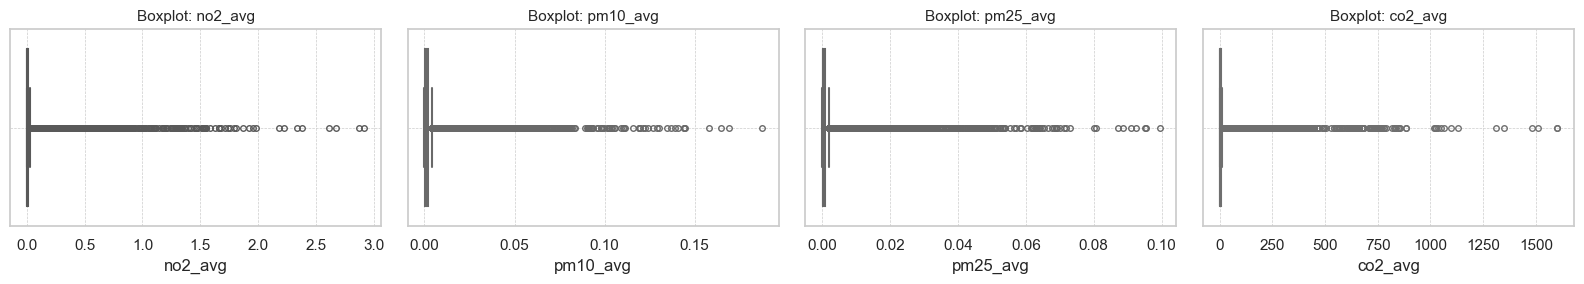

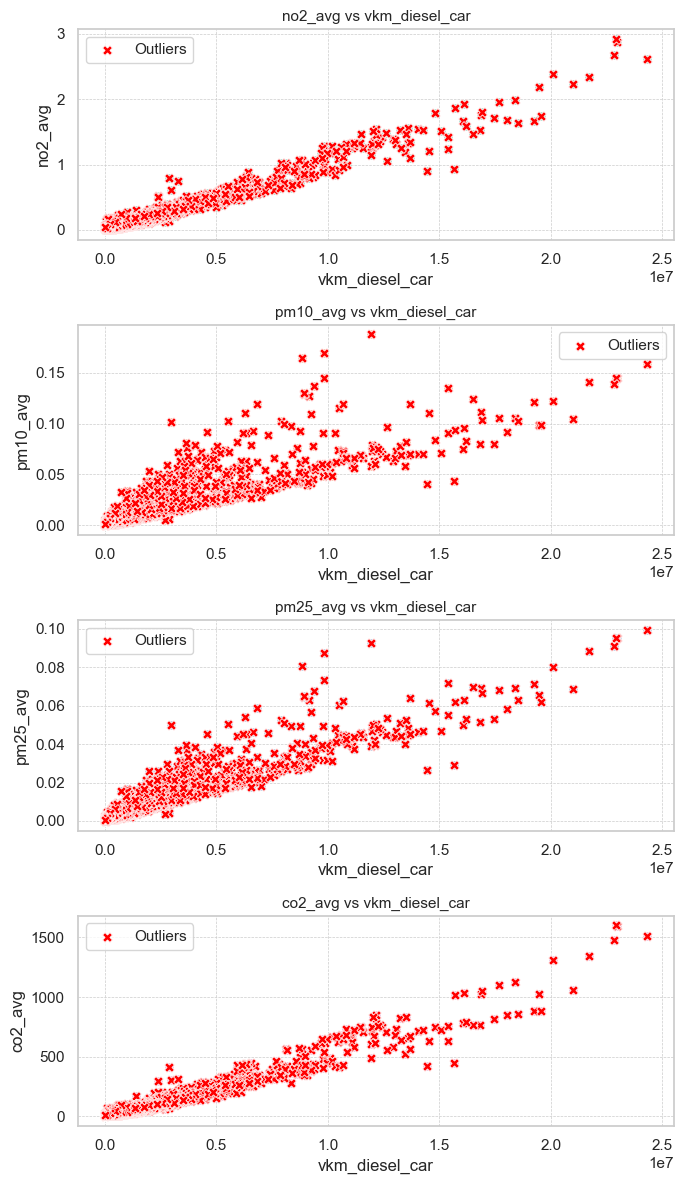

,road_classification,aadt_motorcycle,aadt_taxi,aadt_petrol_car,aadt_diesel_car,aadt_electric_car,aadt_petrol_phv,aadt_diesel_phv,aadt_electric_phv,aadt_petrol_lgv,...,vkm_hgvs_articulated_6_axles,vkm_buses,vkm_coaches,no2_avg,pm10_avg,pm25_avg,co2_avg,laei_zone_Inner London,laei_zone_Non-GLA,laei_zone_Outer London
3,0,178.0,14.0,7280.0,5031.0,43.0,395.0,325.0,6.0,30.0,...,63396.0,0.0,97388.0,0.164691,0.025206,0.012406,64.934024,0,1,0
8,0,385.0,41.0,15431.0,10664.0,91.0,728.0,599.0,10.0,59.0,...,338794.0,0.0,373063.0,0.453034,0.065317,0.032831,199.313984,0,1,0
16,0,303.0,82.0,13017.0,8996.0,77.0,323.0,266.0,5.0,40.0,...,381294.0,0.0,127944.0,0.406159,0.054177,0.028072,195.289508,0,1,0
17,0,158.0,45.0,7082.0,4894.0,42.0,236.0,194.0,3.0,20.0,...,37785.0,0.0,10646.0,0.057426,0.006120,0.003340,27.275373,0,1,0
21,0,172.0,82.0,8041.0,5557.0,48.0,195.0,160.0,3.0,20.0,...,34692.0,13243.0,12683.0,0.087590,0.015217,0.007481,37.369203,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78859,3,1268.0,5035.0,1771.0,1522.0,43.0,1092.0,651.0,17.0,14.0,...,0.0,0.0,0.0,0.043978,0.003841,0.002045,15.778320,0,0,0
78907,3,1156.0,4829.0,1672.0,1436.0,41.0,890.0,530.0,14.0,10.0,...,0.0,0.0,0.0,0.085438,0.007545,0.004012,29.097571,0,0,0
79036,3,1021.0,2132.0,1559.0,1340.0,38.0,1014.0,605.0,16.0,20.0,...,455.0,70617.0,13941.0,0.029747,0.003917,0.001903,14.273521,0,0,0
79090,3,1433.0,4631.0,2014.0,1730.0,49.0,1461.0,871.0,23.0,17.0,...,306.0,6986.0,1377.0,0.032894,0.003270,0.001689,12.175912,0,0,0


In [227]:
# detect outliers using IQR method

utils.detect_outliers_iqr(final_merged_df, ['no2_avg', 'pm10_avg', 'pm25_avg', 'co2_avg'], 
                          scatter=True, scatter_x='vkm_diesel_car')

In [228]:
# remove outliers using IQR method
final_merged_df = utils.remove_outliers_iqr(final_merged_df, ['no2_avg', 'pm10_avg', 'pm25_avg', 'co2_avg'])

Shape before removing outliers: (79222, 46)
Removed 8513 (10.75 %) outliers from ['no2_avg', 'pm10_avg', 'pm25_avg', 'co2_avg']
Shape after removing outliers: (70709, 46)


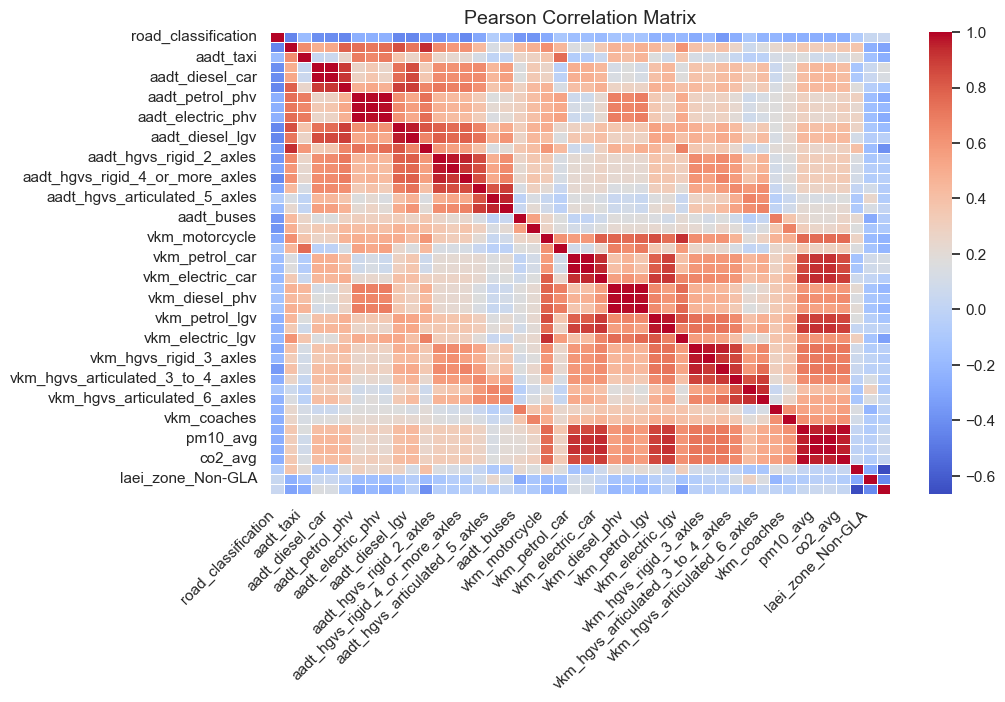

,road_classification,aadt_motorcycle,aadt_taxi,aadt_petrol_car,aadt_diesel_car,aadt_electric_car,aadt_petrol_phv,aadt_diesel_phv,aadt_electric_phv,aadt_petrol_lgv,...,vkm_hgvs_articulated_6_axles,vkm_buses,vkm_coaches,no2_avg,pm10_avg,pm25_avg,co2_avg,laei_zone_Inner London,laei_zone_Non-GLA,laei_zone_Outer London
road_classification,1.000000,-0.444168,-0.178223,-0.400373,-0.406825,-0.436324,-0.243344,-0.248444,-0.240895,-0.428010,...,-0.228775,-0.213192,-0.243202,-0.245697,-0.252244,-0.247971,-0.244522,-0.067451,0.042502,0.044551
aadt_motorcycle,-0.444168,1.000000,0.630068,0.488743,0.518909,0.787296,0.738758,0.712919,0.743809,0.838352,...,0.153526,0.235835,0.252709,0.351515,0.315836,0.314883,0.350146,0.372056,-0.247020,-0.302224
aadt_taxi,-0.178223,0.630068,1.000000,0.038530,0.057516,0.247729,0.690695,0.650413,0.699185,0.377192,...,-0.017250,0.118105,0.129472,0.161539,0.087400,0.089556,0.139270,0.201283,-0.150724,-0.254826
aadt_petrol_car,-0.400373,0.488743,0.038530,1.000000,0.999274,0.898343,0.268208,0.345014,0.252351,0.732308,...,0.414027,0.060361,0.170387,0.408616,0.441902,0.445059,0.411826,-0.115612,0.053177,0.155883
aadt_diesel_car,-0.406825,0.518909,0.057516,0.999274,1.000000,0.914407,0.289529,0.363323,0.274049,0.751475,...,0.410430,0.067246,0.175815,0.413144,0.444947,0.447986,0.416541,-0.091999,0.044655,0.134831
aadt_electric_car,-0.436324,0.787296,0.247729,0.898343,0.914407,1.000000,0.485040,0.519850,0.474141,0.885175,...,0.333316,0.134544,0.217211,0.421943,0.435584,0.437037,0.427222,0.176550,-0.051006,-0.103628
aadt_petrol_phv,-0.243344,0.738758,0.690695,0.268208,0.289529,0.485040,1.000000,0.990095,0.996809,0.624092,...,0.132466,0.177473,0.217800,0.292060,0.236810,0.237903,0.286471,0.292068,-0.170909,-0.264226
aadt_diesel_phv,-0.248444,0.712919,0.650413,0.345014,0.363323,0.519850,0.990095,1.000000,0.984494,0.639649,...,0.180976,0.170734,0.223858,0.316698,0.265864,0.267547,0.311251,0.230185,-0.162637,-0.196976
aadt_electric_phv,-0.240895,0.743809,0.699185,0.252351,0.274049,0.474141,0.996809,0.984494,1.000000,0.613066,...,0.124700,0.175305,0.213242,0.286501,0.229960,0.231064,0.280606,0.277026,-0.170843,-0.266568
aadt_petrol_lgv,-0.428010,0.838352,0.377192,0.732308,0.751475,0.885175,0.624092,0.639649,0.613066,1.000000,...,0.347718,0.165888,0.240144,0.417522,0.397805,0.399410,0.414822,0.268492,-0.109847,-0.179726


In [229]:
corr_matrix = compute_and_visualize_correlation(final_merged_df, method='pearson')

corr_matrix

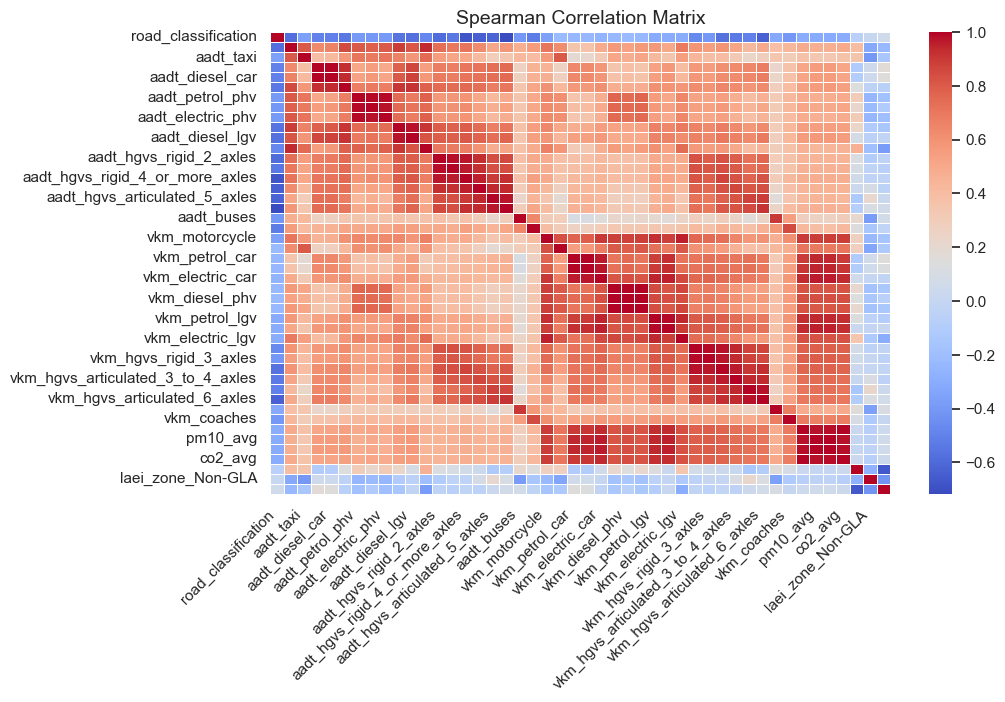

,road_classification,aadt_motorcycle,aadt_taxi,aadt_petrol_car,aadt_diesel_car,aadt_electric_car,aadt_petrol_phv,aadt_diesel_phv,aadt_electric_phv,aadt_petrol_lgv,...,vkm_hgvs_articulated_6_axles,vkm_buses,vkm_coaches,no2_avg,pm10_avg,pm25_avg,co2_avg,laei_zone_Inner London,laei_zone_Non-GLA,laei_zone_Outer London
road_classification,1.000000,-0.582023,-0.363399,-0.499975,-0.508044,-0.542574,-0.393397,-0.407055,-0.393003,-0.561792,...,-0.630868,-0.317894,-0.405322,-0.303715,-0.312030,-0.308483,-0.304838,-0.063340,0.013190,0.060245
aadt_motorcycle,-0.582023,1.000000,0.801602,0.633578,0.658317,0.847703,0.803187,0.783721,0.804256,0.889301,...,0.501342,0.387834,0.432389,0.491396,0.476302,0.475906,0.491820,0.396884,-0.317276,-0.233867
aadt_taxi,-0.363399,0.801602,1.000000,0.389584,0.410646,0.582478,0.710919,0.692386,0.716718,0.661650,...,0.286997,0.348912,0.305893,0.369744,0.340715,0.340139,0.364070,0.349906,-0.408500,-0.148242
aadt_petrol_car,-0.499975,0.633578,0.389584,1.000000,0.999206,0.921707,0.508895,0.556106,0.498717,0.782602,...,0.680155,0.221938,0.367408,0.514490,0.557048,0.558628,0.516796,-0.108376,0.053040,0.173492
aadt_diesel_car,-0.508044,0.658317,0.410646,0.999206,1.000000,0.935914,0.528185,0.573053,0.518389,0.800099,...,0.680040,0.229542,0.373823,0.520364,0.561353,0.562890,0.522714,-0.087423,0.044113,0.151569
aadt_electric_car,-0.542574,0.847703,0.582478,0.921707,0.935914,1.000000,0.677976,0.695406,0.672151,0.908541,...,0.633259,0.283524,0.406778,0.539137,0.563116,0.564180,0.542224,0.139346,-0.046039,-0.070343
aadt_petrol_phv,-0.393397,0.803187,0.710919,0.508895,0.528185,0.677976,1.000000,0.992980,0.986696,0.747665,...,0.466779,0.317348,0.416447,0.495399,0.476430,0.477568,0.496416,0.306288,-0.244937,-0.186271
aadt_diesel_phv,-0.407055,0.783721,0.692386,0.556106,0.573053,0.695406,0.992980,1.000000,0.978939,0.753466,...,0.504532,0.314171,0.423456,0.513235,0.497412,0.498836,0.513253,0.218063,-0.223788,-0.112191
aadt_electric_phv,-0.393003,0.804256,0.716718,0.498717,0.518389,0.672151,0.986696,0.978939,1.000000,0.742604,...,0.454026,0.311941,0.407150,0.483770,0.463703,0.464823,0.484549,0.310170,-0.247005,-0.194726
aadt_petrol_lgv,-0.561792,0.889301,0.661650,0.782602,0.800099,0.908541,0.747665,0.753466,0.742604,1.000000,...,0.634821,0.306166,0.426524,0.545481,0.544587,0.545925,0.541693,0.229805,-0.110161,-0.148340


In [230]:
# Compute and visualize the correlation matrix using Spearman method
corr_matrix = compute_and_visualize_correlation(final_merged_df, method='spearman')

corr_matrix

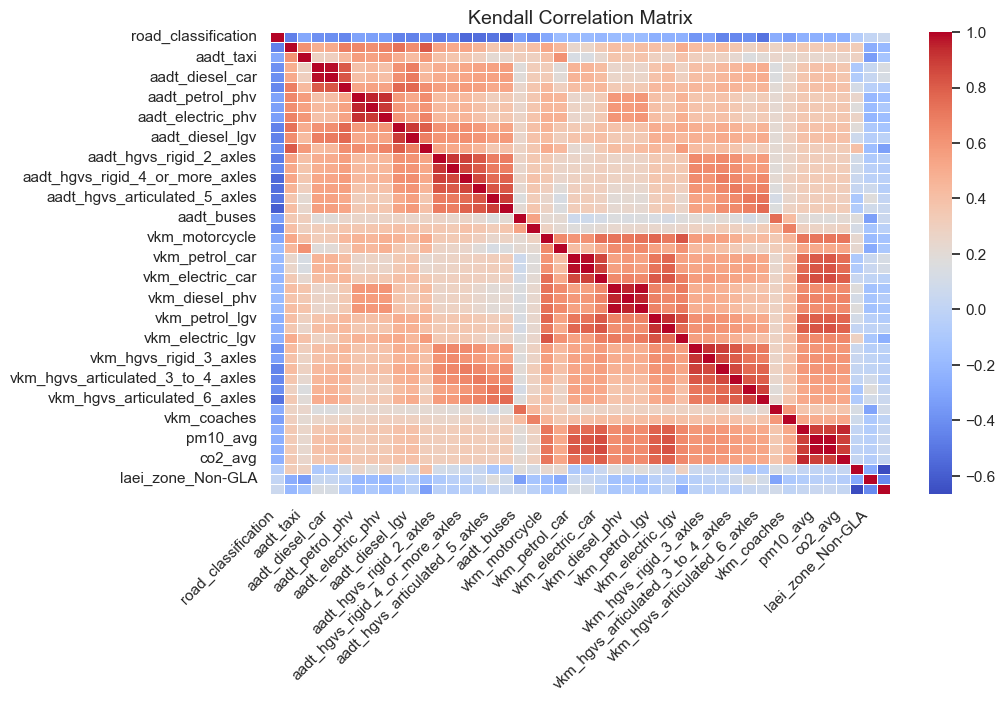

,road_classification,aadt_motorcycle,aadt_taxi,aadt_petrol_car,aadt_diesel_car,aadt_electric_car,aadt_petrol_phv,aadt_diesel_phv,aadt_electric_phv,aadt_petrol_lgv,...,vkm_hgvs_articulated_6_axles,vkm_buses,vkm_coaches,no2_avg,pm10_avg,pm25_avg,co2_avg,laei_zone_Inner London,laei_zone_Non-GLA,laei_zone_Outer London
road_classification,1.000000,-0.462188,-0.285794,-0.397886,-0.404303,-0.434100,-0.310996,-0.322942,-0.329783,-0.453742,...,-0.510211,-0.258756,-0.322399,-0.237437,-0.243471,-0.240737,-0.238495,-0.060432,0.012585,0.057479
aadt_motorcycle,-0.462188,1.000000,0.610109,0.487878,0.505813,0.684472,0.651145,0.625152,0.670806,0.729966,...,0.348850,0.274910,0.302632,0.343018,0.331572,0.331290,0.343394,0.324415,-0.259343,-0.191163
aadt_taxi,-0.285794,0.610109,1.000000,0.285100,0.299685,0.429872,0.565134,0.545095,0.590595,0.494762,...,0.198011,0.249126,0.213434,0.254121,0.233412,0.232982,0.250179,0.286248,-0.334182,-0.121273
aadt_petrol_car,-0.397886,0.487878,0.285100,1.000000,0.982124,0.805631,0.388318,0.430290,0.390490,0.611990,...,0.493000,0.154287,0.252780,0.359800,0.392325,0.393455,0.361300,-0.088506,0.043315,0.141684
aadt_diesel_car,-0.404303,0.505813,0.299685,0.982124,1.000000,0.823690,0.402580,0.442930,0.405517,0.628428,...,0.493152,0.159625,0.257336,0.364252,0.395810,0.396904,0.365811,-0.071397,0.036026,0.123784
aadt_electric_car,-0.434100,0.684472,0.429872,0.805631,0.823690,1.000000,0.531244,0.546024,0.540097,0.759592,...,0.456607,0.199943,0.283909,0.381731,0.400619,0.401355,0.384030,0.114613,-0.037867,-0.057858
aadt_petrol_phv,-0.310996,0.651145,0.565134,0.388318,0.402580,0.531244,1.000000,0.948056,0.927932,0.582496,...,0.324338,0.223059,0.291911,0.344439,0.329585,0.330369,0.345335,0.250968,-0.200698,-0.152627
aadt_diesel_phv,-0.322942,0.625152,0.545095,0.430290,0.442930,0.546024,0.948056,1.000000,0.902948,0.587710,...,0.353338,0.220422,0.296776,0.358282,0.345604,0.346620,0.358345,0.178753,-0.183445,-0.091966
aadt_electric_phv,-0.329783,0.670806,0.590595,0.390490,0.405517,0.540097,0.927932,0.902948,1.000000,0.601652,...,0.333630,0.233699,0.302393,0.355102,0.338673,0.339467,0.355829,0.270034,-0.215042,-0.169528
aadt_petrol_lgv,-0.453742,0.729966,0.494762,0.611990,0.628428,0.759592,0.582496,0.587710,0.601652,1.000000,...,0.461317,0.219081,0.301671,0.389263,0.388248,0.389215,0.386111,0.190718,-0.091424,-0.123109


In [231]:
# Compute and visualize the correlation matrix using Kendall method
corr_matrix = compute_and_visualize_correlation(final_merged_df, method='kendall')

corr_matrix

In [232]:
correlations_df = utils.analyze_correlations(final_merged_df, 'co2_avg')
correlations_df

,pearson_co2_avg,spearman_co2_avg,kendall_co2_avg,f_statistic_co2_avg,mi_r_co2_avg
no2_avg,0.990308,0.995141,0.943465,3.594902e+06,2.404295
pm25_avg,0.959222,0.980425,0.890132,8.143228e+05,1.916243
pm10_avg,0.954873,0.977953,0.884308,7.307917e+05,1.874792
vkm_electric_car,0.890850,0.934612,0.792235,2.718879e+05,1.182593
vkm_diesel_lgv,0.886866,0.931178,0.783159,2.605223e+05,1.110909
vkm_petrol_lgv,0.865753,0.924001,0.769399,2.115885e+05,1.029662
vkm_diesel_car,0.861656,0.906422,0.752068,2.038313e+05,1.077330
vkm_petrol_car,0.854339,0.898806,0.742346,1.910696e+05,1.047964
vkm_motorcycle,0.757406,0.892044,0.715786,9.514106e+04,0.905936
vkm_hgvs_rigid_2_axles,0.708913,0.780821,0.591850,7.143414e+04,0.538516


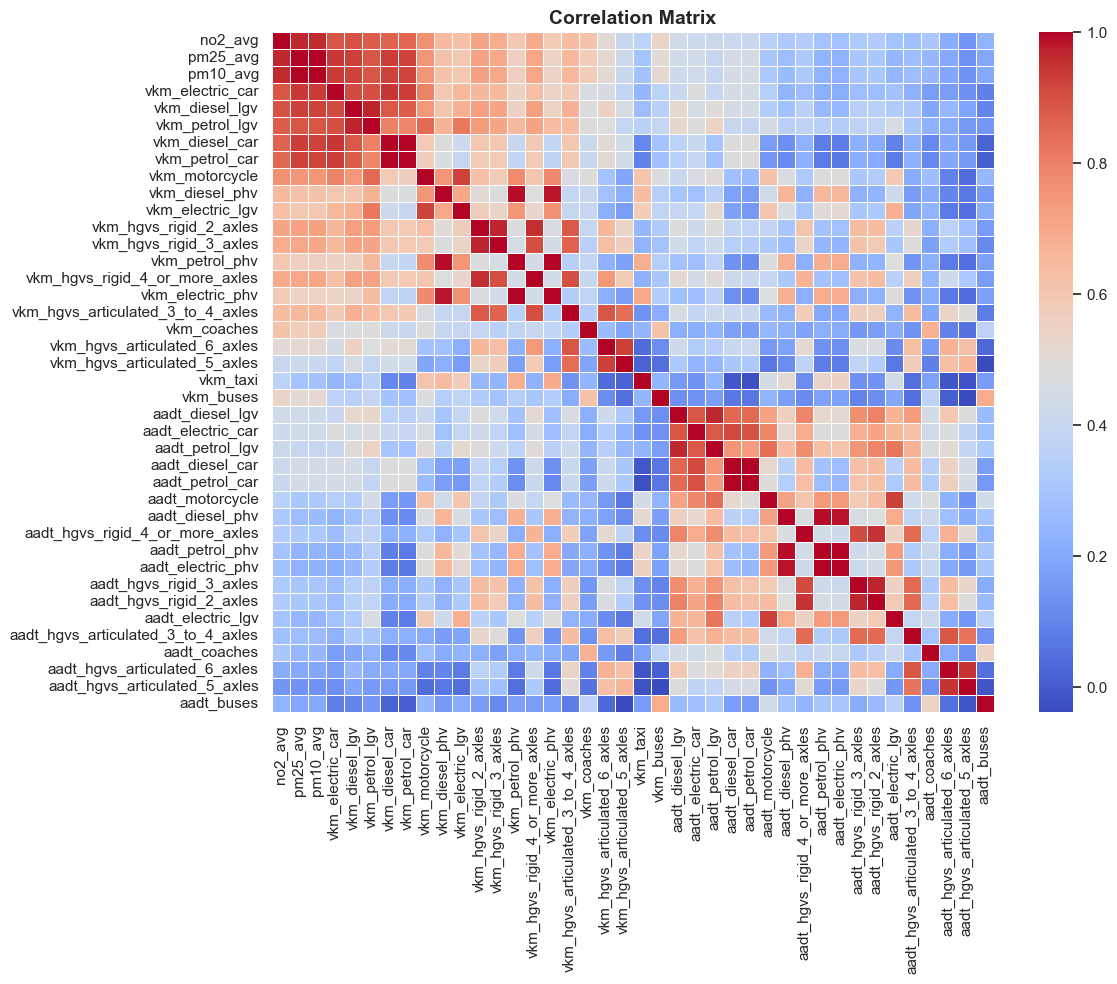

['no2_avg',
 'pm25_avg',
 'pm10_avg',
 'vkm_electric_car',
 'vkm_diesel_lgv',
 'vkm_petrol_lgv',
 'vkm_diesel_car',
 'vkm_petrol_car',
 'vkm_motorcycle',
 'vkm_diesel_phv',
 'vkm_electric_lgv',
 'vkm_hgvs_rigid_2_axles',
 'vkm_hgvs_rigid_3_axles',
 'vkm_petrol_phv',
 'vkm_hgvs_rigid_4_or_more_axles',
 'vkm_electric_phv',
 'vkm_hgvs_articulated_3_to_4_axles',
 'vkm_coaches',
 'vkm_hgvs_articulated_6_axles',
 'vkm_hgvs_articulated_5_axles',
 'vkm_taxi',
 'vkm_buses',
 'aadt_diesel_lgv',
 'aadt_electric_car',
 'aadt_petrol_lgv',
 'aadt_diesel_car',
 'aadt_petrol_car',
 'aadt_motorcycle',
 'aadt_diesel_phv',
 'aadt_hgvs_rigid_4_or_more_axles',
 'aadt_petrol_phv',
 'aadt_electric_phv',
 'aadt_hgvs_rigid_3_axles',
 'aadt_hgvs_rigid_2_axles',
 'aadt_electric_lgv',
 'aadt_hgvs_articulated_3_to_4_axles',
 'aadt_coaches',
 'aadt_hgvs_articulated_6_axles',
 'aadt_hgvs_articulated_5_axles',
 'aadt_buses']

In [233]:
# plot the correlation matrix for the top 40 correlated features with 'co2_avg'
utils.plot_correlation_matrix(correlations_df, final_merged_df, top_n=40)

In [234]:
# based on the correlation matrix, we can see that 'vkm_diesel_car' and other similar featues have the highest correlation with 'co2_avg', so we will use it as the target variable
# while other features such as road classification has lower correlation with 'co2_avg' and other emissions, therefore we will drop it

final_merged_df.drop(columns=['road_classification'], inplace=True)

In [235]:
final_merged_df.columns

Index(['aadt_motorcycle', 'aadt_taxi', 'aadt_petrol_car', 'aadt_diesel_car',
       'aadt_electric_car', 'aadt_petrol_phv', 'aadt_diesel_phv',
       'aadt_electric_phv', 'aadt_petrol_lgv', 'aadt_diesel_lgv',
       'aadt_electric_lgv', 'aadt_hgvs_rigid_2_axles',
       'aadt_hgvs_rigid_3_axles', 'aadt_hgvs_rigid_4_or_more_axles',
       'aadt_hgvs_articulated_3_to_4_axles', 'aadt_hgvs_articulated_5_axles',
       'aadt_hgvs_articulated_6_axles', 'aadt_buses', 'aadt_coaches',
       'vkm_motorcycle', 'vkm_taxi', 'vkm_petrol_car', 'vkm_diesel_car',
       'vkm_electric_car', 'vkm_petrol_phv', 'vkm_diesel_phv',
       'vkm_electric_phv', 'vkm_petrol_lgv', 'vkm_diesel_lgv',
       'vkm_electric_lgv', 'vkm_hgvs_rigid_2_axles', 'vkm_hgvs_rigid_3_axles',
       'vkm_hgvs_rigid_4_or_more_axles', 'vkm_hgvs_articulated_3_to_4_axles',
       'vkm_hgvs_articulated_5_axles', 'vkm_hgvs_articulated_6_axles',
       'vkm_buses', 'vkm_coaches', 'no2_avg', 'pm10_avg', 'pm25_avg',
       'co2_avg', 'lae

In [237]:
# save the final merged dataframe to a csv file
final_merged_df.to_csv('./preprocessed_data/final_merged_df.csv', index=False)

In [238]:
# load the merged dataframe from the csv file
final_merged_df = pd.read_csv('./preprocessed_data/final_merged_df.csv')

**Choice of variables**

AADT is the total volume of vehicle traffic on a road segment over a year
VKM measures the total distance travelled by all vehicles on a road network over a specific period
VKM is estimated using AADT and speed. It is more useful for estimating emissions than AADT

Thus, we will remove all the AADT columns, and the remaining features will be used for predicting the targets: _co2_avg_, _pm10_avg_, _pm25_avg_, and _no2_avg_.

In [239]:
# drop aadt columns and keep vkm columns
final_merged_df.drop(columns=['aadt_motorcycle', 'aadt_taxi',
       'aadt_petrol_car', 'aadt_diesel_car', 'aadt_electric_car',
       'aadt_petrol_phv', 'aadt_diesel_phv', 'aadt_electric_phv',
       'aadt_petrol_lgv', 'aadt_diesel_lgv', 'aadt_electric_lgv',
       'aadt_hgvs_rigid_2_axles', 'aadt_hgvs_rigid_3_axles',
       'aadt_hgvs_rigid_4_or_more_axles', 'aadt_hgvs_articulated_3_to_4_axles',
       'aadt_hgvs_articulated_5_axles', 'aadt_hgvs_articulated_6_axles',
       'aadt_buses', 'aadt_coaches'], inplace=True)

In [240]:
# save features list in a csv file
final_merged_df.to_csv('./preprocessed_data/final_dataset.csv', index=False)

In [241]:
# final list of features used for training
selected_columns = final_merged_df.columns
selected_columns

Index(['vkm_motorcycle', 'vkm_taxi', 'vkm_petrol_car', 'vkm_diesel_car',
       'vkm_electric_car', 'vkm_petrol_phv', 'vkm_diesel_phv',
       'vkm_electric_phv', 'vkm_petrol_lgv', 'vkm_diesel_lgv',
       'vkm_electric_lgv', 'vkm_hgvs_rigid_2_axles', 'vkm_hgvs_rigid_3_axles',
       'vkm_hgvs_rigid_4_or_more_axles', 'vkm_hgvs_articulated_3_to_4_axles',
       'vkm_hgvs_articulated_5_axles', 'vkm_hgvs_articulated_6_axles',
       'vkm_buses', 'vkm_coaches', 'no2_avg', 'pm10_avg', 'pm25_avg',
       'co2_avg', 'laei_zone_Inner London', 'laei_zone_Non-GLA',
       'laei_zone_Outer London'],
      dtype='object')